## Below scripts helps to displays out of 91 websites, how many websites from a specific country, F-PKI map server provide proper website certificate data log JSON file.

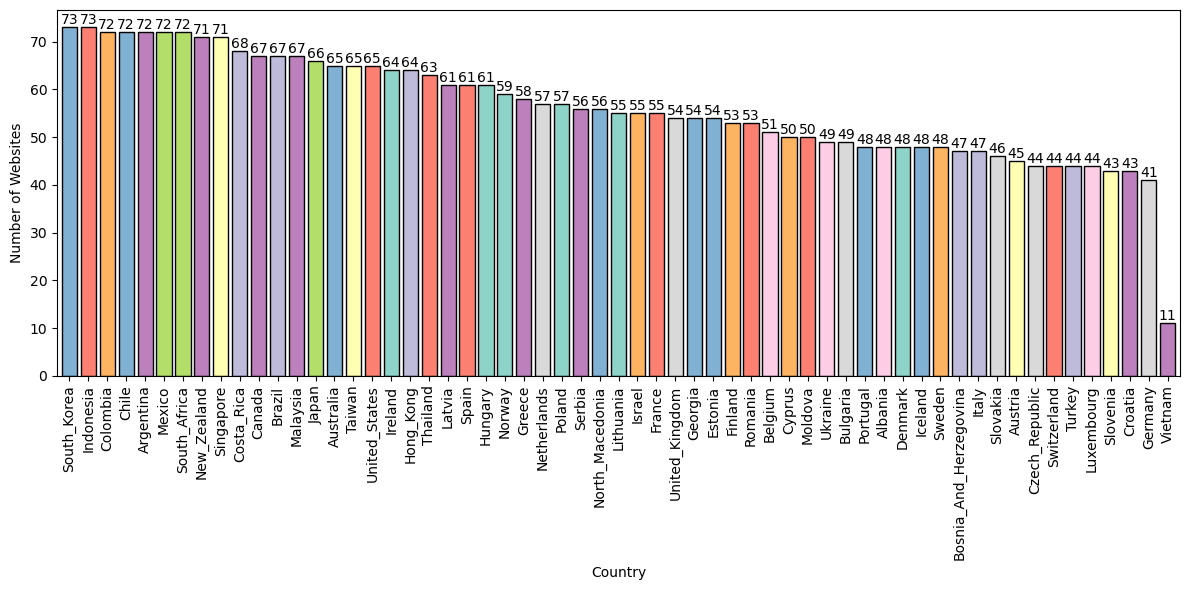

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random


merge = pd.read_csv('new_case1_all_rtt_size_duration.csv')
merge = merge.dropna()


country_counts = merge['Country'].value_counts()
country_counts_sorted = country_counts.sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(12, 6))  
colors = [plt.cm.Set3(random.randint(0, 9)) for _ in range(len(country_counts_sorted))]
country_counts_sorted.plot(kind='bar', ax=ax, edgecolor='black',color=colors, width=0.8) 



for i, count in enumerate(country_counts_sorted):
    ax.text(i, count, str(count), ha='center', va='bottom')


ax.set_xlabel('Country')
ax.set_ylabel('Number of Websites')
ax.set_xticklabels(country_counts_sorted.index, rotation=90)




plt.tight_layout()
#plt.savefig("case1counry.png", dpi=300, bbox_inches='tight') 
plt.show()


## Below script check the average page load times, we want to see when extension and F-PKI map server act normally (as the JSON file has all the values) and that time users face any delay in page loading

/var/folders/s_/_j_p7ynd17x8z8g_l8b2yw180000gn/T/ipykernel_6049/2387215709.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_with_fpki = mode(average_page_load_time_with_fpki_sorted)[0][0]
/var/folders/s_/_j_p7ynd17x8z8g_l8b2yw180000gn/T/ipykernel_6049/2387215709.py:28: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

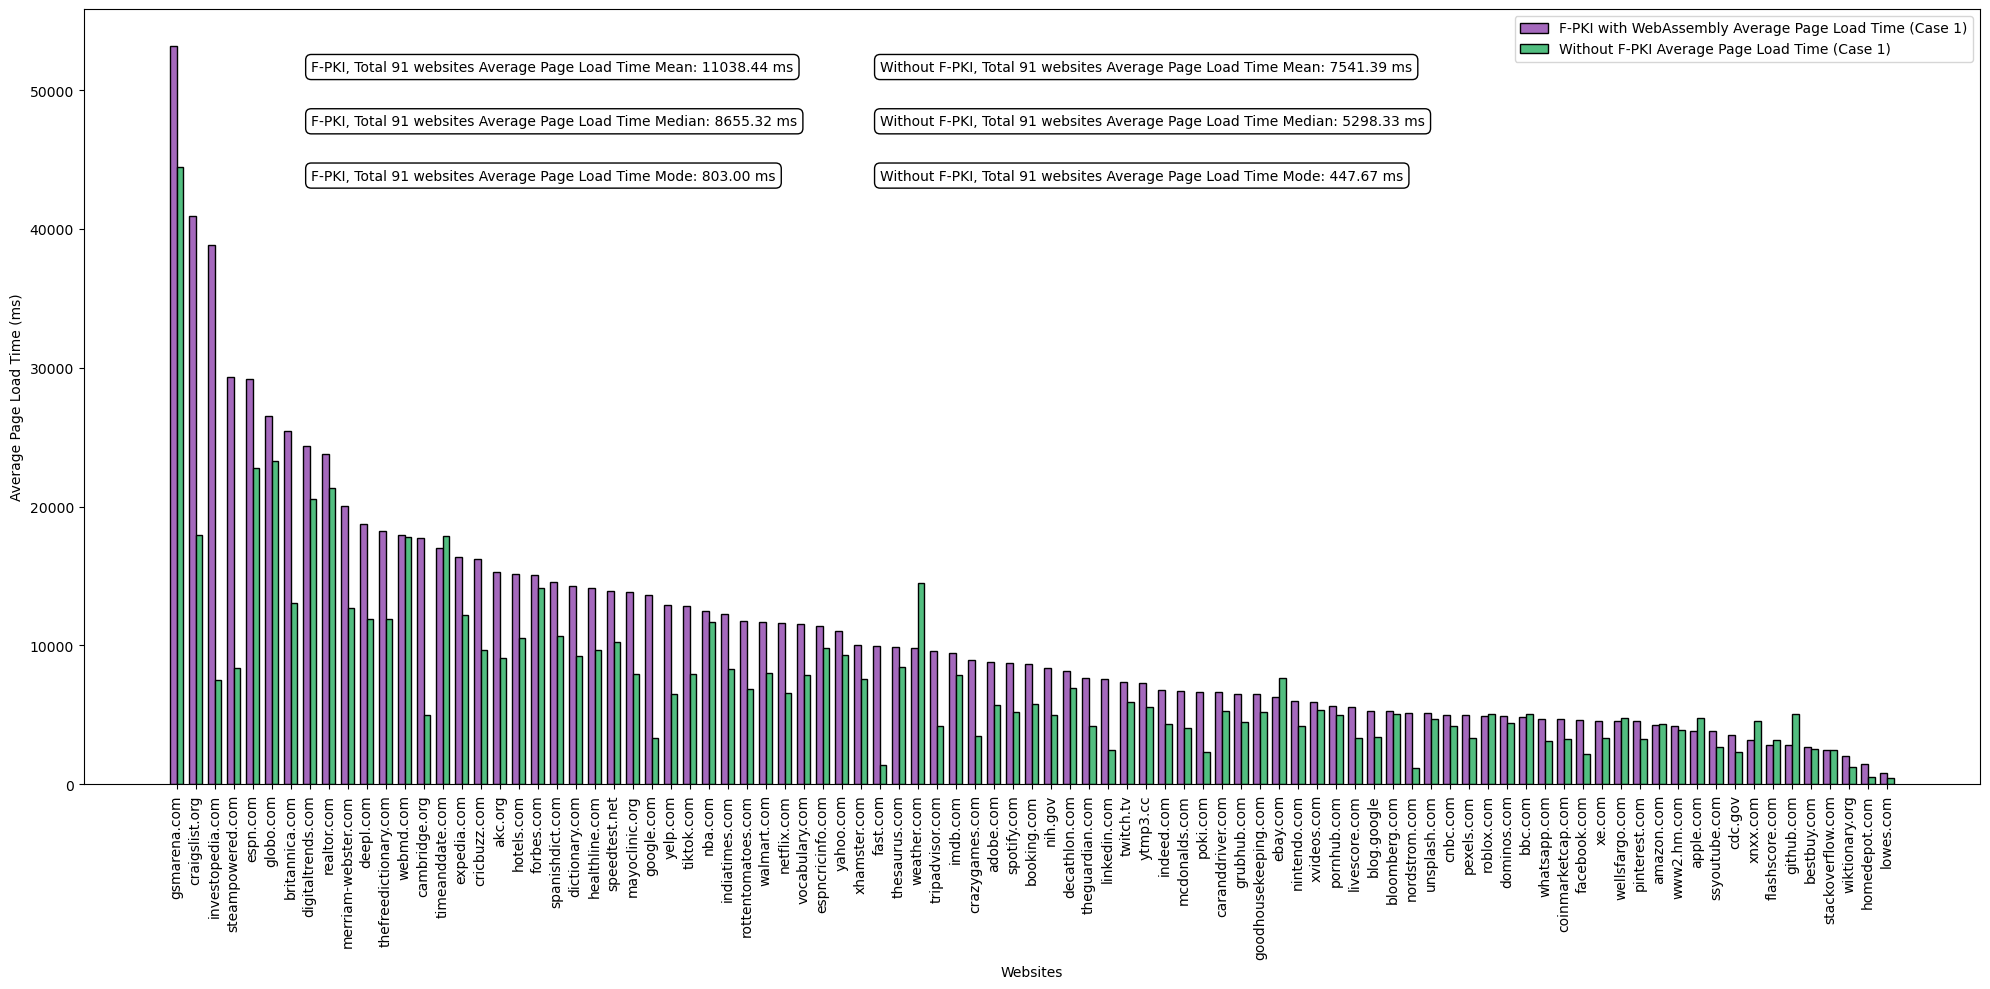

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode


merge = pd.read_csv('nowasmrttsizes10merged.csv')
merge = merge.dropna()


average_page_load_time_with_fpki = merge.groupby('Website')['Page Load Time_x'].mean()
average_page_load_time_without_fpki = merge.groupby('Website')['Page Load Time_y'].mean()

average_page_load_time_with_fpki_sorted = average_page_load_time_with_fpki.sort_values(ascending=False)
average_page_load_time_without_fpki_sorted = average_page_load_time_without_fpki.sort_values(ascending=False)

common_countries = list(set(average_page_load_time_with_fpki_sorted.index).intersection(average_page_load_time_without_fpki_sorted.index))

average_page_load_time_with_fpki_sorted = average_page_load_time_with_fpki_sorted.loc[common_countries]
average_page_load_time_without_fpki_sorted = average_page_load_time_without_fpki_sorted.loc[common_countries]

mean_with_fpki = average_page_load_time_with_fpki_sorted.mean()
median_with_fpki = average_page_load_time_with_fpki_sorted.median()
mode_with_fpki = mode(average_page_load_time_with_fpki_sorted)[0][0]

mean_without_fpki = average_page_load_time_without_fpki_sorted.mean()
median_without_fpki = average_page_load_time_without_fpki_sorted.median()
mode_without_fpki = mode(average_page_load_time_without_fpki_sorted)[0][0]


fig, ax = plt.subplots(figsize=(20, 10))
width = 0.35

x = np.arange(len(common_countries))
x_sorted = sorted(range(len(average_page_load_time_with_fpki_sorted)), key=lambda i: average_page_load_time_with_fpki_sorted.iloc[i], reverse=True)


rects1 = ax.bar(x - width/2, average_page_load_time_with_fpki_sorted.values[x_sorted], width, edgecolor='black', color='#a569bd', label='F-PKI with WebAssembly Average Page Load Time (Case 1)')
rects2 = ax.bar(x + width/2, average_page_load_time_without_fpki_sorted.values[x_sorted], width, edgecolor='black', color='#52be80', label='Without F-PKI Average Page Load Time (Case 1)')

ax.text(0.12, 0.92, f"F-PKI, Total 91 websites Average Page Load Time Mean: {mean_with_fpki:.2f} ms", transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax.text(0.12, 0.85, f"F-PKI, Total 91 websites Average Page Load Time Median: {median_with_fpki:.2f} ms", transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax.text(0.12, 0.78, f"F-PKI, Total 91 websites Average Page Load Time Mode: {mode_with_fpki:.2f} ms", transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))

ax.text(0.42, 0.92, f"Without F-PKI, Total 91 websites Average Page Load Time Mean: {mean_without_fpki:.2f} ms", transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax.text(0.42, 0.85, f"Without F-PKI, Total 91 websites Average Page Load Time Median: {median_without_fpki:.2f} ms", transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax.text(0.42, 0.78, f"Without F-PKI, Total 91 websites Average Page Load Time Mode: {mode_without_fpki:.2f} ms", transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))


ax.set_xticks(x)
ax.set_xticklabels(average_page_load_time_with_fpki_sorted.index[x_sorted], rotation=90)

ax.set_ylabel('Average Page Load Time (ms)')
ax.set_xlabel('Websites')

ax.legend()

plt.tight_layout()
#plt.savefig("case1PageLoadTime.png", dpi=300, bbox_inches='tight') 
plt.show()
